In [1]:
import numpy as np
import pyfftw as pfft
import cupy as cp

from IO import cfl
from FFT import fft
from util import process_3d
from util import phase_3d
from scipy import sparse
from scipy import optimize

from NUFFT import nufft_gpu
from util import imshow_3d

In [2]:
traj = cfl.readcfl(name='GPI_traj')
data = cfl.readcfl(name='cGPI_data')
NFT = nufft_gpu.NUFFT3D(np.real(traj))
img = NFT.adjoint(data)

Est. kspace size: [[-200  200]
 [-200  200]
 [ -41   41]]
Batch Grid time: 9.74985957145691
Batch Grid time: 18.419196128845215
Batch Grid time: 26.03148603439331


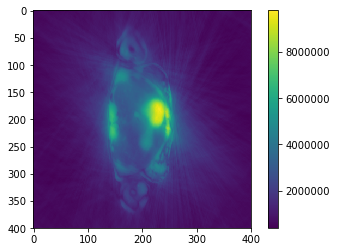

In [3]:
img0 = np.sqrt(np.sum(np.abs(img**2),axis=3))
imshow_3d.imshow3d(np.abs(img0[:,:,50]))

In [10]:
func = cp.ElementwiseKernel('float32 x, float32 y', 'float32 z', 'z = y * x','multiply')

In [36]:
a = cp.zeros([6,3,2],dtype=cp.float32)
b = cp.ones([1,3],dtype=cp.int32)
c = cp.array([[4,2,3],[4,5,6],[7,8,9]])
a+b

ValueError: Broadcasting failed

In [4]:
q = np.ones([2,3])
p = cp.asarray(q)